## Autoencoders

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
encoding_dim = 32
input_img = Input(shape = (784,))
encoded = Dense(encoding_dim, activation = "relu")(input_img)
decoded = Dense(784, activation = "sigmoid")(encoded)
autoencoder = Model(input_img, decoded)


In [3]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape = (encoding_dim, ))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer = "adadelta", loss = "binary_crossentropy")



In [5]:
from keras.datasets import mnist
import numpy as np

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [7]:
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = (x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.3583 - val_loss: 0.2709
Epoch 2/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.2636 - val_loss: 0.2530
Epoch 3/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.2431 - val_loss: 0.2307
Epoch 4/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.2221 - val_loss: 0.2112
Epoch 5/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2058 - val_loss: 0.1981
Epoch 6/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.1950 - val_loss: 0.1893
Epoch 7/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1872 - val_loss: 0.1824
Epoch 8/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1807 - val_loss: 0.1763
Epoch 9/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.1750 - val_loss: 0.1708
Epoch

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [9]:
import matplotlib.pyplot as plt


n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

## Sparse Autoencoders


In [10]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(1e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder_sparse = Model(input_img, decoded)
autoencoder_sparse.compile(optimizer='adadelta', loss='binary_crossentropy')

In [39]:
autoencoder_sparse.fit(x_train, x_train, epochs = 100, batch_size = 256, shuffle = True, validation_data = (x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.6731 - val_loss: 0.6484
Epoch 2/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.6284 - val_loss: 0.6090
Epoch 3/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.5916 - val_loss: 0.5749
Epoch 4/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.4531 - val_loss: 0.4

In [40]:
decoded_imgs_sparse = autoencoder_sparse.predict(x_test)

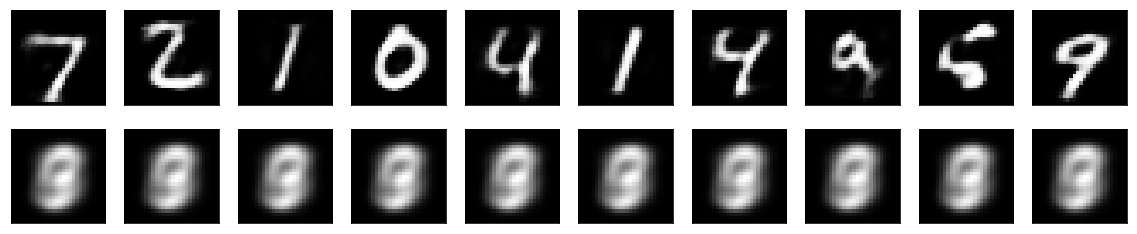

In [41]:
import matplotlib.pyplot as plt


n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_sparse[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

## Deep Autoencoders


In [42]:
input_img = Input(shape = (784, ))
encoded = Dense(128, activation = "relu")(input_img)
encoded = Dense(64, activation = "relu")(encoded)
encoded = Dense(32, activation = "relu")(encoded)

decoded = Dense(64, activation = "relu")(encoded)
decoded = Dense(128, activation = "relu")(decoded)
decoded = Dense(784, activation = "sigmoid")(decoded)

In [43]:
autoencoder_deep = Model(input_img, decoded)
autoencoder_deep.compile(optimizer = "adadelta", loss = "binary_crossentropy")
autoencoder_deep.fit(x_train, x_train, epochs = 100, batch_size = 256, shuffle = True, validation_data = (x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.3250 - val_loss: 0.2635
Epoch 2/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.2575 - val_loss: 0.2517
Epoch 3/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.2394 - val_loss: 0.2260
Epoch 4/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.2176 - val_loss: 0.2060
Epoch 5/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.2018 - val_loss: 0.1954
Epoch 6/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.1924 - val_loss: 0.1872
Epoch 7/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1838 - val_loss: 0.1805
Epoch 8/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.1773 - val_loss: 0.1748
Epoch 9/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.1723 - val_loss: 0.

60000/60000 [==============================] - 6s 103us/step - loss: 0.1037 - val_loss: 0.1013
Epoch 78/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.1035 - val_loss: 0.1017
Epoch 79/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.1033 - val_loss: 0.1025
Epoch 80/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1030 - val_loss: 0.1038
Epoch 81/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.1029 - val_loss: 0.1011
Epoch 82/100
60000/60000 [==============================] - 5s 92us/step - loss: 0.1027 - val_loss: 0.1016
Epoch 83/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.1024 - val_loss: 0.1000
Epoch 84/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.1022 - val_loss: 0.1016
Epoch 85/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.1020 - val_loss: 0.1011
Epoch 86/100
60000/60000 [=======================

In [48]:
decoded_imgs_deep = autoencoder.predict(x_test)

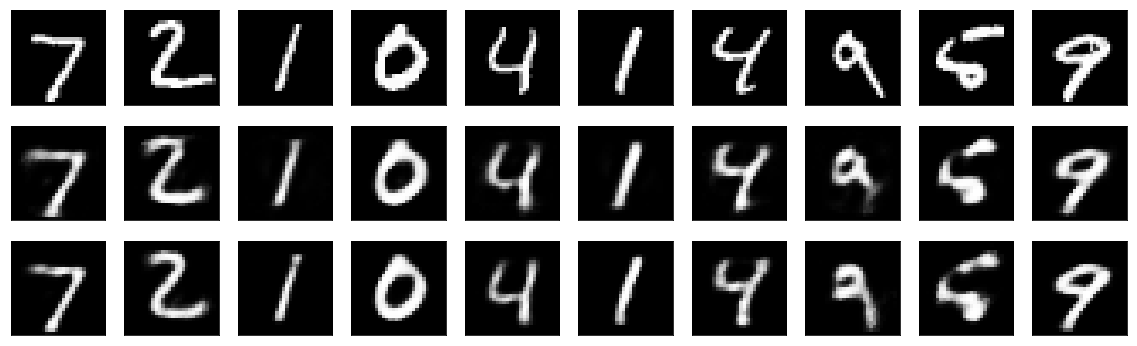

In [52]:
import matplotlib.pyplot as plt


n = 10
plt.figure(figsize = (20, 6))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_imgs_deep[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

## Convolutional Autoencoder

In [11]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K


In [59]:
input_img = Input(shape = (28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_cnn = Model(input_img, decoded)
autoencoder_cnn.compile(optimizer='adadelta', loss='binary_crossentropy')

In [12]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [30]:
from keras.callbacks import TensorBoard
    
autoencoder_cnn.fit(x_train, x_train,
            epochs = 50,
            batch_size = 128,
            shuffle = True,
            validation_data = (x_test, x_test),
            callbacks = [TensorBoard(log_dir = './logs')])

NameError: name 'autoencoder_cnn' is not defined

In [81]:
encoder = Model(input_img, encoded)
encoded_cnn_imgs = encoder.predict(x_test)
print(encoded_cnn_imgs.shape)

(10000, 4, 4, 8)


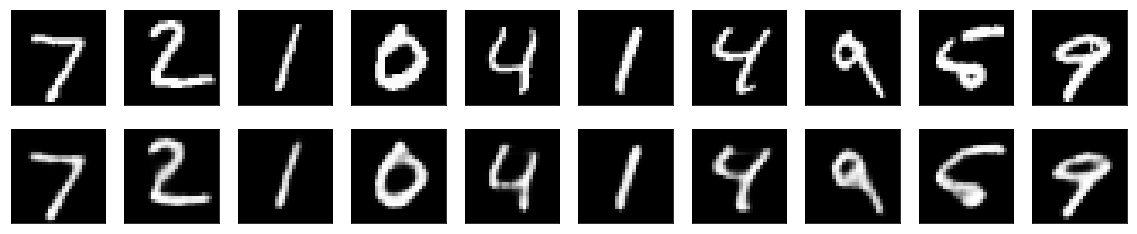

In [70]:
decoded_cnn_imgs = autoencoder_cnn.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_cnn_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

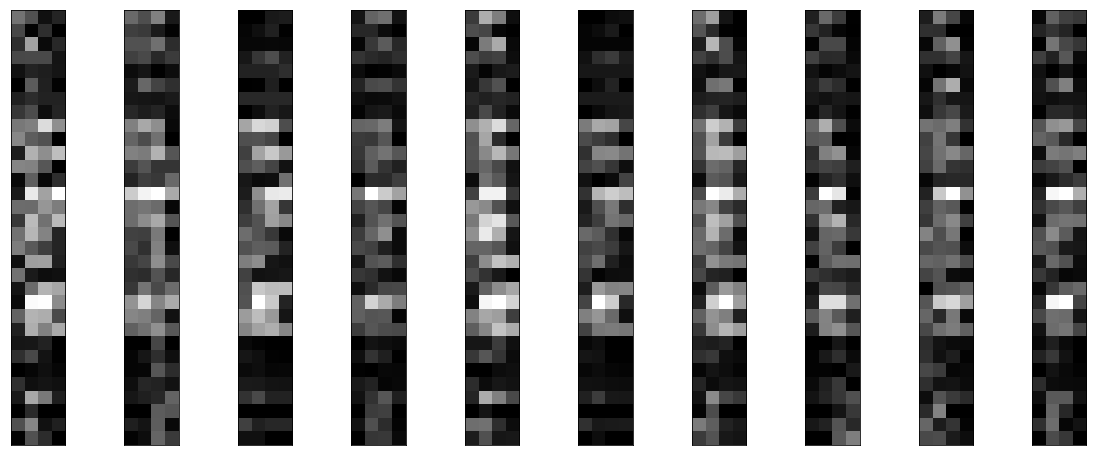

In [82]:
n = 10
plt.figure(figsize = (20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_cnn_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Image Denoising

In [14]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0, scale = 1, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0, scale = 1, size = x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0, 1)
x_test_noisy = np.clip(x_test_noisy, 0, 1)


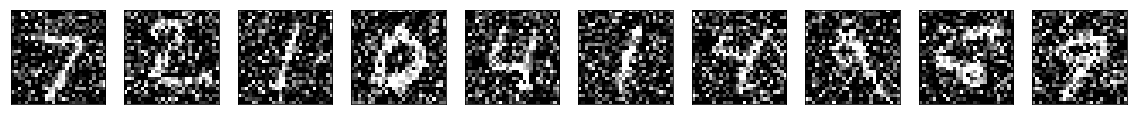

In [25]:
n = 10
plt.figure(figsize = (20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i - 1].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
    
    

In [32]:
input_img = Input(shape = (28, 28, 1))

x = Conv2D(32, (3, 3), activation = "relu", padding = "same")(input_img)
x = MaxPooling2D((2, 2), padding = "same")(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_denoise = Model(input_img, decoded)
autoencoder_denoise.compile(optimizer = "adadelta", loss = "binary_crossentropy")


In [33]:
autoencoder_denoise.fit(x_train_noisy, x_train, epochs = 100, batch_size = 128, shuffle = True, validation_data = (x_test_noisy, x_test), callbacks=[TensorBoard(log_dir = "./logs/", histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 156s 3ms/step - loss: 0.1822 - val_loss: 0.1260
Epoch 2/100
60000/60000 [==============================] - 228s 4ms/step - loss: 0.1197 - val_loss: 0.1173
Epoch 3/100
60000/60000 [==============================] - 285s 5ms/step - loss: 0.1120 - val_loss: 0.1080
Epoch 4/100
60000/60000 [==============================] - 233s 4ms/step - loss: 0.1082 - val_loss: 0.1071
Epoch 5/100
60000/60000 [==============================] - 160s 3ms/step - loss: 0.1056 - val_loss: 0.1032
Epoch 6/100
60000/60000 [==============================] - 155s 3ms/step - loss: 0.1042 - val_loss: 0.1036
Epoch 7/100
60000/60000 [==============================] - 163s 3ms/step - loss: 0.1031 - val_loss: 0.1011
Epoch 8/100
60000/60000 [==============================] - 158s 3ms/step - loss: 0.1024 - val_loss: 0.1007
Epoch 9/100
60000/60000 [==============================] - 161s 3ms/step - loss: 0.1017 - val_

60000/60000 [==============================] - 154s 3ms/step - loss: 0.0946 - val_loss: 0.0942
Epoch 77/100
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0947 - val_loss: 0.0941
Epoch 78/100
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0946 - val_loss: 0.0940
Epoch 79/100
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0946 - val_loss: 0.0942
Epoch 80/100
60000/60000 [==============================] - 155s 3ms/step - loss: 0.0945 - val_loss: 0.0943
Epoch 81/100
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0945 - val_loss: 0.0940
Epoch 82/100
60000/60000 [==============================] - 173s 3ms/step - loss: 0.0945 - val_loss: 0.0940
Epoch 83/100
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0945 - val_loss: 0.0944
Epoch 84/100
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0945 - val_loss: 0.0940
Epoch 85/100
60000/60000 [===============

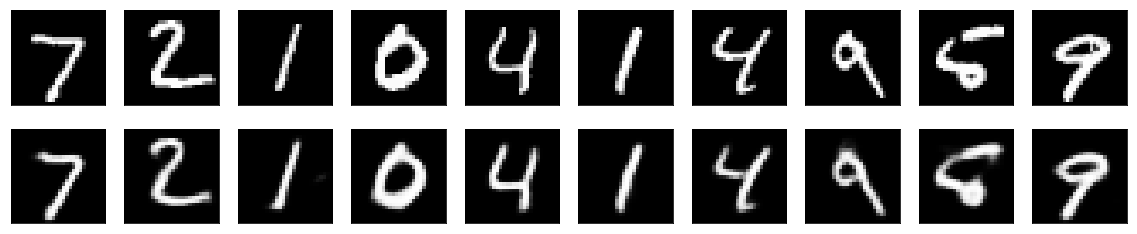

In [34]:
decoded_denoise_imgs = autoencoder_denoise.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_denoise_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()